<a href="https://colab.research.google.com/github/Ak-Gautam/sd3_medium/blob/main/sd3_med_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stable Diffusion 3 Medium (Method 3)
Working code to run Stable Diffusion 3 Medium efficiently. Highly cutomizable. <br>
**Kindly give me a follow on X and star repo on Github.** <br>
[![twitter](https://img.icons8.com/?size=100&id=YfCbGWCWcuar&format=png&color=000000)](https://x.com/Gautam_A_k)
[![GitHub](https://img.icons8.com/?size=100&id=3tC9EQumUAuq&format=png&color=000000)](https://github.com/Ak-Gautam/)

Installing all the necessary libraries, specifying the library version so that it doesn't break in 2, 3 days lol.

In [1]:
# Install required libraries
!pip install diffusers==0.29.0 transformers==4.41.2 accelerate==0.31.0 sentencepiece==0.2.0 peft==0.11.1 gradio==4.36.1 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 2.9 MB/s 

In [2]:
import numpy as np
import random
import torch
from diffusers import StableDiffusion3Pipeline
from huggingface_hub import snapshot_download
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [3]:
# @title #### Loading the model.
# @markdown SD3 medium is a gated model and it requires you to generate a token and then pass it here ```huggingface_token = "..."``` where replace '...' with your token. You can go to https://huggingface.co/settings/tokens for your personal tokens.
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16
MAX_SEED = np.iinfo(np.int32).max
huggingface_token = "..." # @param {type:"string"}

repo_id = "stabilityai/stable-diffusion-3-medium-diffusers"
model_path = snapshot_download(
    repo_id=repo_id,
    repo_type="model",
    ignore_patterns=["*.md", "*..gitattributes"],
    local_dir="stable-diffusion-3-medium",
    token=huggingface_token,
)

pipe = StableDiffusion3Pipeline.from_pretrained(
    model_path,
    text_encoder_3=None,
    tokenizer_3=None,
    torch_dtype=torch.float16,
)
print(pipe)

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/573 [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

mmdit.png:   0%|          | 0.00/266k [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/247M [00:00<?, ?B/s]

sd3demo.jpg:   0%|          | 0.00/7.40M [00:00<?, ?B/s]

text_encoder_3/config.json:   0%|          | 0.00/740 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(…)t_encoder_3/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_3/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer_3/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_3/tokenizer_config.json:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/739 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.17G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusion3Pipeline {
  "_class_name": "StableDiffusion3Pipeline",
  "_diffusers_version": "0.29.0",
  "_name_or_path": "/content/stable-diffusion-3-medium",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_3": [
    null,
    null
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_3": [
    null,
    null
  ],
  "transformer": [
    "diffusers",
    "SD3Transformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



#### Model inputs
Here I have hardcoded parameters that works pretty balanced. You can always adjust the code a little to control these params such as `GUIDANCE_SCALE` and `NEGATIVE_PROMPT`.

In [4]:
# @title #### Model Params
# @markdown I recommend leaving these params as it is and just running the cell for first time.
NEGATIVE_PROMPT = "deformed, distorted, disfigured, poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, mutated hands and fingers, disconnected limbs, mutation, mutated, ugly, disgusting, blurry, amputation" # @param {type:"string"}
# @markdown ___
# @markdown Leaving Seed 0 will generate random seed.
SEED = 0  # @param {type:"integer"}
# RANDOMIZE_SEED = True
# @markdown ___
WIDTH = 1024
HEIGHT = 1024
# @markdown keeping it between 7 and 8 produces ideal results
GUIDANCE_SCALE = 7.0 # @param {type:"slider", min:5, max:12, step:0.5}
# @markdown ___
# @markdown Around 25-28 steps give refined images, less steps will give cartoonish but will run faster.
NUM_INFERENCE_STEPS = 28 # @param {type:"slider", min:5, max:40, step:1}

def infer(prompt):
    seed = random.randint(0, MAX_SEED) if SEED == 0 else SEED

    generator = torch.Generator().manual_seed(seed)
    pipe.enable_sequential_cpu_offload()
    # pipe.enable_model_cpu_offload()
    image = pipe(
        prompt=prompt,
        negative_prompt=NEGATIVE_PROMPT,
        guidance_scale=GUIDANCE_SCALE,
        num_inference_steps=NUM_INFERENCE_STEPS,
        width=WIDTH,
        height=HEIGHT,
        generator=generator,
    ).images[0]

    return image, seed

  0%|          | 0/28 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


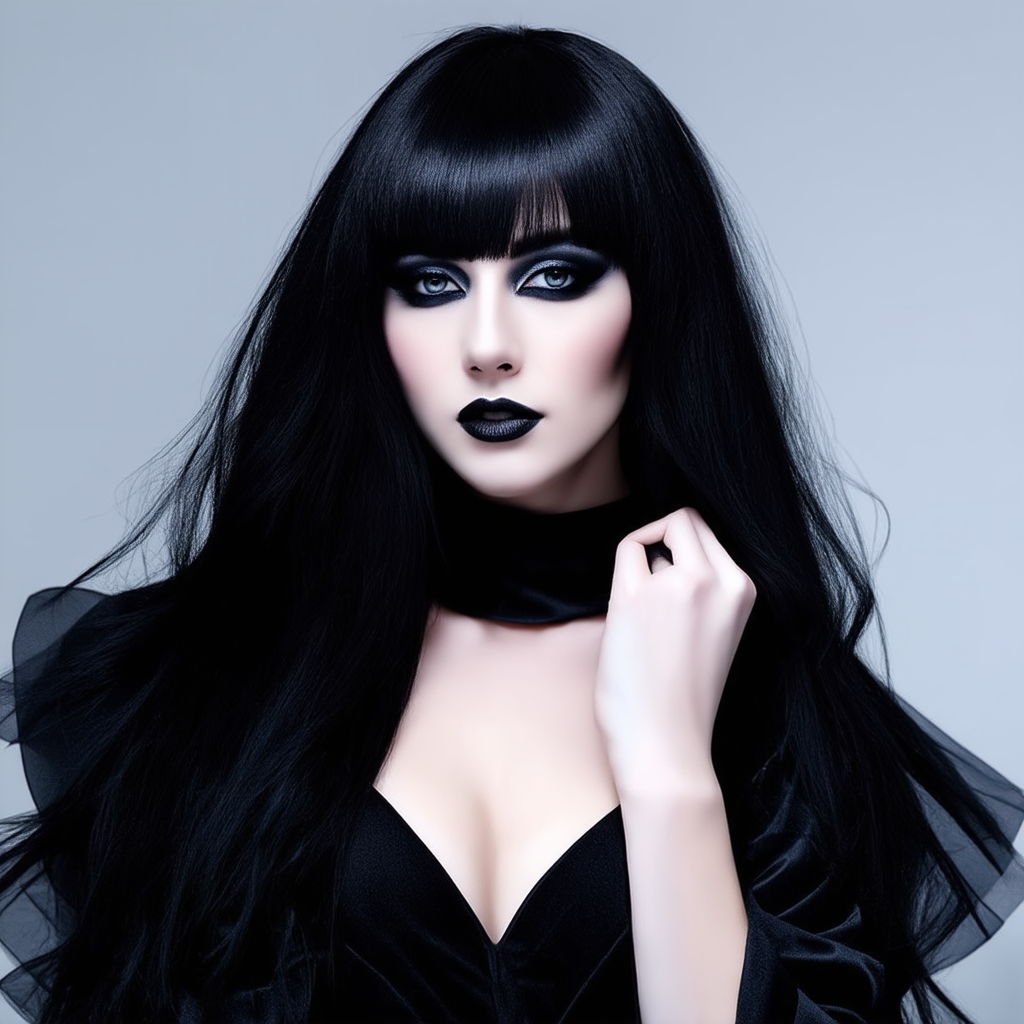

Seed: 1880073900


In [5]:
# @title #### Displaying the Output
# @markdown Here we enter the prompt and wait for the image. Displaying the seed for future purposes. There are also some example prompts given for easy of use and understanding the prompting.
# @markdown ___
# @markdown **Select an example prompt from the dropdown or enter your own.**
prompt = "Closeup portrait photo of beautiful goth woman, makeup." # @param ["A cardboard with text 'New York' which is large and sits on a theater stage.", "A red sofa on top of a white building.", "A painting of an astronaut riding a pig wearing a tutu holding a pink umbrella.", "Studio photograph closeup of a chameleon over a black background.", "Closeup portrait photo of beautiful goth woman, makeup.", "A living room, bright modern Scandinavian style house, large windows.", "Portrait photograph of an anthropomorphic tortoise seated on a New York City subway train.", "Batman, cute modern Disney style, Pixar 3d portrait, ultra detailed, gorgeous, 3d zbrush, trending on dribbble, 8k render.", "Cinnamon bun on the plate, watercolor painting, detailed, brush strokes, light palette, light, cozy.", "A lion, colorful, low-poly, cyan and orange eyes, poly-hd, 3d, low-poly game art, polygon mesh, jagged, blocky, wireframe edges, centered composition.", "Long exposure photo of Tokyo street, blurred motion, streaks of light, surreal, dreamy, ghosting effect, highly detailed.", "A glamorous digital magazine photoshoot, a fashionable model wearing avant-garde clothing, set in a futuristic cyberpunk roof-top environment, with a neon-lit city background, intricate high fashion details, backlit by vibrant city glow, Vogue fashion photography.", "Masterpiece, best quality, girl, collarbone, wavy hair, looking at viewer, blurry foreground, upper body, necklace, contemporary, plain pants, intricate, print, pattern, ponytail, freckles, red hair, dappled sunlight, smile, happy."] {allow-input: true}

image, seed = infer(prompt)

display(image)
print(f"Seed: {seed}")

### Thats a Wrap!